# Linear regression on sum of all pixels

In [1]:
import numpy as np
from matplotlib import pylab as plt

In [2]:
import src.operate_datasets    as operate_datasets
import src.model_visualisation as model_visualisation
import src.model_evaluation    as model_evaluation

Welcome to JupyROOT 6.18/00


## Load data

In [3]:
full_X, full_y = operate_datasets.load_dataset('~/snd_data/new_dataset/', 'sum')

X_train, y_train, _, _ = operate_datasets.split_dataset(full_X, full_y)

In [4]:
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

In [5]:
min_clip = 500
X_train_clp, y_train_clp = operate_datasets.clip_dataset(X_train, y_train, min_clip)

## Fit regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [7]:
reg_l2 = LinearRegression().fit(X_train_clp, y_train_clp) # positive=True ???
#reg_l1 = Lasso(positive=False).fit(X_train, y_train) # positive=True ???

score_l2 = reg_l2.score(X_train.reshape(-1, 1), y_train)

print('L2: ', score_l2)

y_pred_l2 = reg_l2.predict(X_train)

L2:  -0.0011091982863957739


## Visualise results

In [8]:
print('y = kx + b')
print('k', reg_l2.coef_)
print('b', reg_l2.intercept_)

y = kx + b
k [[3.05415293e-05]]
b [0.17235856]


In [9]:
model_name = 'L2 on full sum (clipped data)'
save_file_prefix = model_name.replace(' ', '-')

In [10]:
save_file_prefix

'L2-on-full-sum-(clipped-data)'

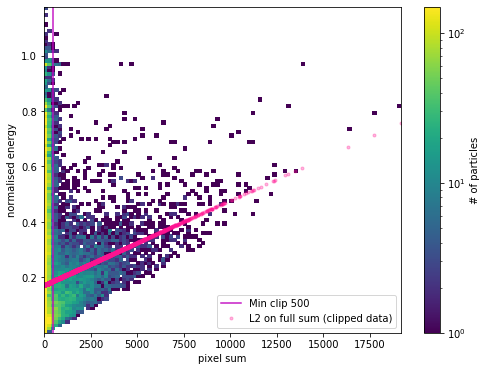

In [11]:
model_visualisation.plot_2d_energy_hist_clip(X_train, y_train, y_pred_l2, min_clip, model_name,
                                             save_file_prefix=save_file_prefix) 

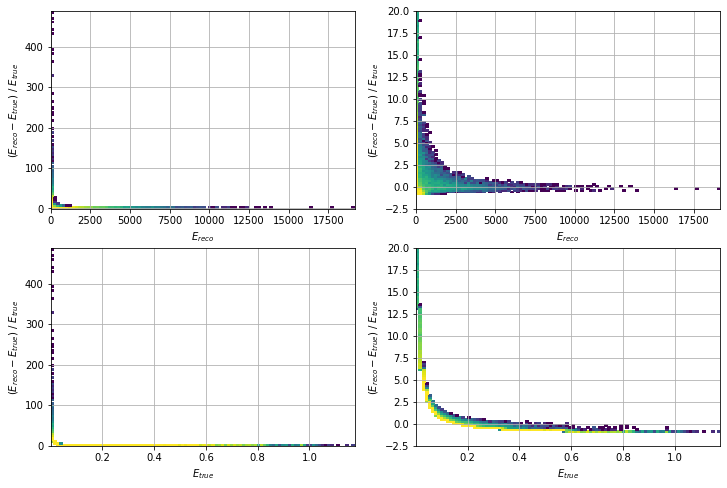

In [12]:
model_visualisation.plot_res_vs_energy(X_train, y_train, y_pred_l2, vmax=450,
                                       save_file_prefix=save_file_prefix)  

mean   = 1.72904e+00
std    = 7.13015e+00
median = 2.34686e-01


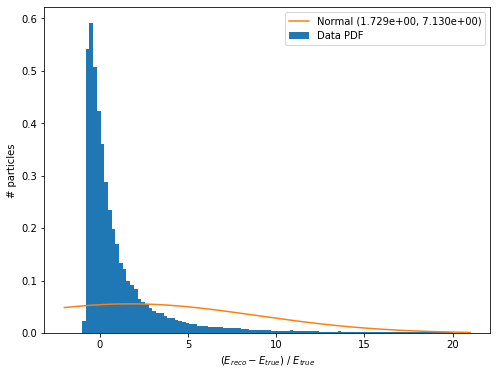

In [13]:
model_visualisation.plot_res_hist_fit(y_train, y_pred_l2, [-1,20],
                                      save_file_prefix=save_file_prefix) 

In [14]:
model_evaluation.save_scores(y_train, y_pred_l2, save_file_prefix)

explained_variance_score 0.014135386116452375
max_error 1.0038494113701475
mean_absolute_error 0.13002435767673517
mean_squared_error 0.032028233739454105
median_absolute_error 0.10409938176327023
r2_score -0.0011091982863957739


,L2-on-full-sum-(clipped-data)
explained_variance_score,0.014135
max_error,1.003849
mean_absolute_error,0.130024
mean_squared_error,0.032028
median_absolute_error,0.104099
r2_score,-0.001109
avg_resolution,1.729036
std_resolution,7.130151
